#### 💧 DiffusionPipeline

[Concept]
- **End to End Support** : 훈련된 확산 모델에서 샘플을 빠르게 생성하도록 설계된 엔드 투 엔드 클래스
- **Pretrained Model Support** : 확산 시스템을 만들기 위한 빌딩 블록으로 사용할 수 있는 사전 훈련된 모델 아키텍처 및 모듈
- **Beta Scheduling** : 학습을 위해 노이즈를 추가하는 방법과 추론 중에 노이즈가 제거된 이미지를 생성하는 방법을 제어하는 알고리즘

[Task]
- **unconditional_image_generation** : 가우시안 노이즈에서 영상 생성	
- **conditional_image_generation** : 텍스트 프롬프트가 주어지면 이미지를 생성	
- **img2img** : 텍스트 프롬프트에 따라 안내되는 이미지 편집	
- **inpaint** : 이미지의 마스킹된 부분을 채우고 이미지, 마스크 및 텍스트 프롬프트가 주어짐
- **depth2img** : 깊이 추정을 통해 구조를 유지하면서 텍스트 프롬프트에 따라 이미지의 일부를 조정

[Structure Example]
- **feature_extractor**: 이미지에서 특징을 추출하는 모듈
- **safety_checker**: 생성된 이미지가 안전한지 확인하는 모듈
- **scheduler**: Beta 스케줄링을 제어하는 모듈
- **text_encoder**: 텍스트를 인코딩하는 모듈
- **tokenizer**: 텍스트를 토큰화하는 모듈
- **unet**: 이미지 생성에 사용되는 U-Net 아키텍처
- **vae**: 변분 오토인코더를 사용하여 이미지를 생성하는 모듈


In [ ]:
# install packages
!python -m pip install --upgrade pip
!pip install --upgrade diffusers accelerate transformers

In [5]:
!echo export TRANSFORMERS_CACHE=/workspace/.cache >> ~/.bashrc
!source ~/.bashrc

In [6]:
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", use_safetensors=True)

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 10.47it/s]


In [8]:
pipeline.to("cuda")

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.1",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [21]:
# StableDiffusionPipelineOutput(images=[<PIL.Image.Image image mode=RGB size=512x512 at 0x7F7F1407ED70>], nsfw_content_detected=[False])
output = pipeline("An photo of a squirrel on a tree branch eating something, masterpieces, realism")


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:07<00:00,  6.52it/s]


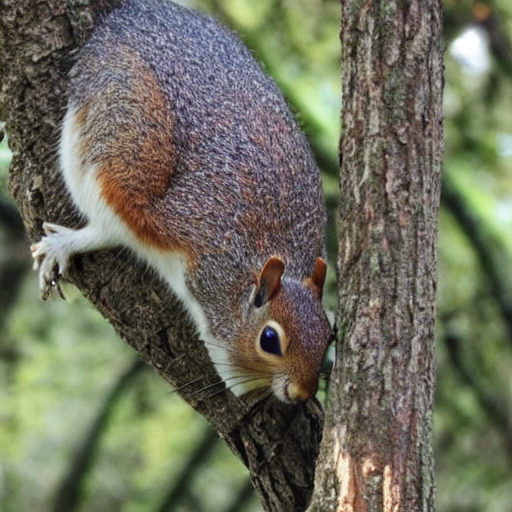

In [22]:
output.images[0]

In [24]:
# it takes a long time (5~10 min) to download the model
# cd /workspsace/models
# git lfs install
# git clone https://huggingface.co/runwayml/stable-diffusion-v1-5
pipeline = DiffusionPipeline.from_pretrained("/workspace/models/stable-diffusion-v1-5", use_safetensors=True)
pipeline.to("cuda")


Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.26.1",
  "_name_or_path": "/workspace/models/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [25]:
output = pipeline("An photo of a squirrel on a tree branch eating something, masterpieces, realism")

100%|██████████| 50/50 [00:07<00:00,  6.50it/s]


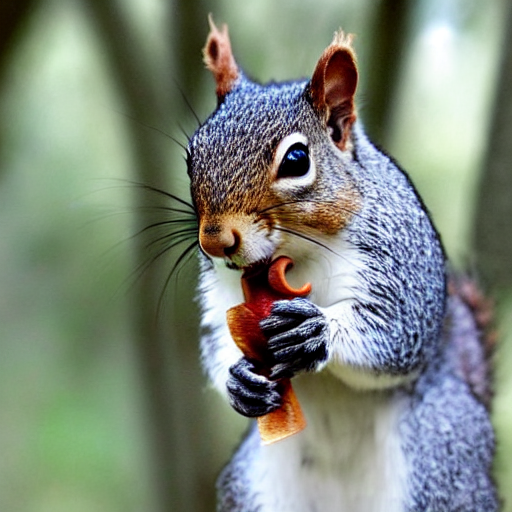

In [26]:
output.images[0]

In [28]:
from diffusers import EulerDiscreteScheduler

pipeline.scheduler = EulerDiscreteScheduler.from_config(pipeline.scheduler.config)
output = pipeline("An photo of a squirrel on a tree branch eating something, masterpieces, realism")


100%|██████████| 50/50 [00:07<00:00,  6.79it/s]


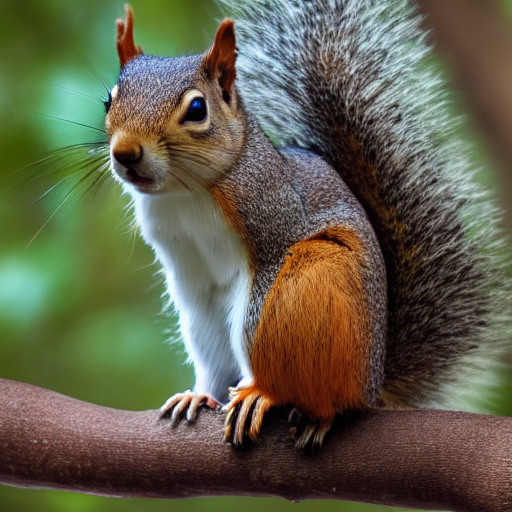

In [29]:
output.images[0]

#### 💧Unconditional Image Generation 으로 내부 조금 더 살펴보기

In [85]:
from diffusers import UNet2DModel

repo_id = "google/ddpm-cat-256"
model = UNet2DModel.from_pretrained(repo_id, use_safetensors=True)

In [86]:
type(model)

diffusers.models.unets.unet_2d.UNet2DModel

In [87]:
model.config

FrozenDict([('sample_size', 256),
            ('in_channels', 3),
            ('out_channels', 3),
            ('center_input_sample', False),
            ('time_embedding_type', 'positional'),
            ('freq_shift', 1),
            ('flip_sin_to_cos', False),
            ('down_block_types',
             ['DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'DownBlock2D',
              'AttnDownBlock2D',
              'DownBlock2D']),
            ('up_block_types',
             ['UpBlock2D',
              'AttnUpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D',
              'UpBlock2D']),
            ('block_out_channels', [128, 128, 256, 256, 512, 512]),
            ('layers_per_block', 2),
            ('mid_block_scale_factor', 1),
            ('downsample_padding', 0),
            ('downsample_type', 'conv'),
            ('upsample_type', 'conv'),
            ('dropout', 0.0),
            ('act_fn', 'si

In [88]:
import torch

torch.manual_seed(0)

noisy_sample = torch.randn(1, model.config.in_channels, model.config.sample_size, model.config.sample_size)

with torch.no_grad():
    # `timestep` indicates how noisy the input image is, with more noise at the beginning and less at the end. 
    # This helps the model determine its position in the diffusion process, whether it is closer to the start or the end.
    noisy_residual = model(sample=noisy_sample, timestep=2).sample  

print(noisy_residual.shape)

torch.Size([1, 3, 256, 256])


In [89]:
from diffusers import DDPMScheduler

scheduler = DDPMScheduler.from_pretrained(repo_id)
scheduler

DDPMScheduler {
  "_class_name": "DDPMScheduler",
  "_diffusers_version": "0.26.1",
  "beta_end": 0.02,
  "beta_schedule": "linear",
  "beta_start": 0.0001,
  "clip_sample": true,
  "clip_sample_range": 1.0,
  "dynamic_thresholding_ratio": 0.995,
  "num_train_timesteps": 1000,
  "prediction_type": "epsilon",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "steps_offset": 0,
  "thresholding": false,
  "timestep_spacing": "leading",
  "trained_betas": null,
  "variance_type": "fixed_small"
}

In [90]:
# less_noisy_sample = scheduler.step(model_output=noisy_residual, timestep=2, sample=noisy_sample).prev_sample
# less_noisy_sample.shape

In [91]:
import PIL.Image
import numpy as np

def display_sample(sample, i):
    # cpu 로 이동 , PIL 에 맞춰서 channel 을 마지막 차원으로 변경 
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    # -1 ~ 1 사이의 값을 0 ~ 255 사이의 값으로 스케일링
    image_processed = (image_processed + 1.0) * 127.5
    # PIL 에 맞춰서 unit8 형식으로 변환
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = PIL.Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)

model.to("cuda")
noisy_sample = noisy_sample.to("cuda")

 10%|▉         | 99/1000 [00:03<00:34, 26.33it/s]

'Image at step 100'

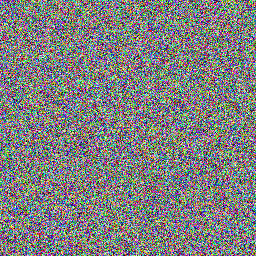

 20%|█▉        | 198/1000 [00:07<00:30, 26.26it/s]

'Image at step 200'

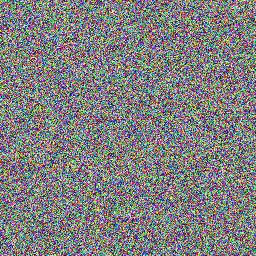

 30%|██▉       | 297/1000 [00:11<00:26, 26.23it/s]

'Image at step 300'

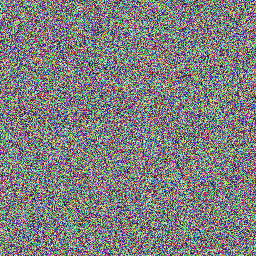

 40%|███▉      | 397/1000 [00:15<00:23, 26.14it/s]

'Image at step 400'

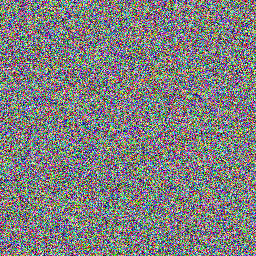

 50%|████▉     | 497/1000 [00:19<00:19, 26.16it/s]

'Image at step 500'

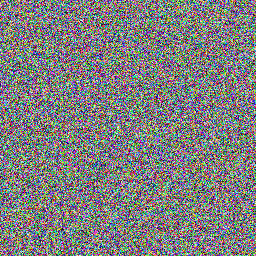

 60%|█████▉    | 597/1000 [00:22<00:15, 26.07it/s]

'Image at step 600'

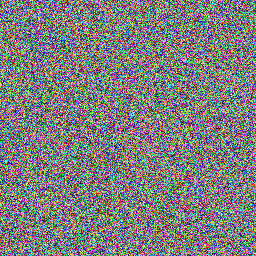

 70%|██████▉   | 697/1000 [00:26<00:11, 26.01it/s]

'Image at step 700'

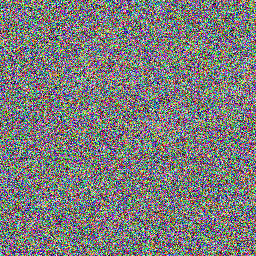

 80%|███████▉  | 797/1000 [00:30<00:07, 25.99it/s]

'Image at step 800'

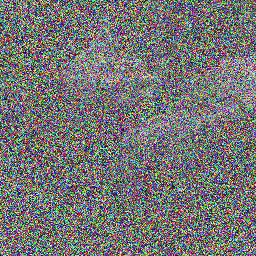

 90%|████████▉ | 897/1000 [00:34<00:03, 26.11it/s]

'Image at step 900'

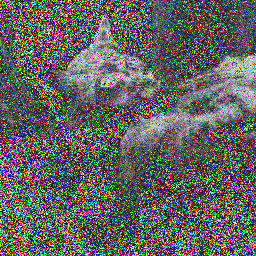

100%|█████████▉| 997/1000 [00:38<00:00, 26.08it/s]

'Image at step 1000'

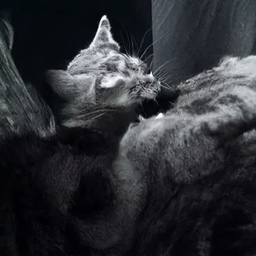

100%|██████████| 1000/1000 [00:38<00:00, 26.01it/s]


In [92]:
# inference with scheduler

import tqdm

sample = noisy_sample

for i, t in enumerate(tqdm.tqdm(scheduler.timesteps)):
    # 1. predict noise residual at timestamp t
    with torch.no_grad():
        residual = model(sample, t).sample

    # 2. compute less noisy image and set X_t -> X_t-1
    sample = scheduler.step(model_output = residual, timestep = t, sample = sample).prev_sample

    # 3. optionally look at image
    if (i + 1) % 100 == 0:
        display_sample(sample, i + 1)

In [93]:
import torch
import gc

pipeline = None

# 모든 텐서를 삭제합니다.
gc.collect()

# PyTorch의 CUDA 캐시를 비웁니다.
torch.cuda.empty_cache()

!nvidia-smi

Sat Feb  3 04:30:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A4500               On  | 00000000:82:00.0 Off |                  Off |
| 30%   29C    P2              45W / 200W |  11656MiB / 20470MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--